# PVT Systems Exercise

This notebook shows how to use Google Colab, a free no-installation tool for running python code from your web browser.

Notebooks are organized by text and code "cells".  You can double-click a cell to start editing it.  To render a text cell, or execute a code cell, hit shift+enter.

## Step 1: install pvlib

pvlib is a python package for simulating the performance of PV systems and accomplishing related tasks, such as calculating solar position.

First, we need to get pvlib installed in the Colab environment.  Active the following code cell (left click) and execute it (shift+enter) to automatically download and install pvlib:

In [ ]:
!pip install pvlib

## Step 2: use pvlib

Here's a simple example of running pvlib code: using pvlib and pandas (a library for data analysis), calculate a clear-sky irradiance profile for Copenhagen for today (September 17).

In [2]:
import pvlib
import pandas as pd

In [3]:
cph = pvlib.location.Location(latitude=55.6846, longitude=12.5389)
times = pd.date_range(start='2024-09-17 00:00', end='2024-09-17 23:59', freq='5min', tz='Europe/Copenhagen')
clearsky_irradiance = cph.get_clearsky(times)

<Axes: title={'center': 'CPH Clear-Sky Simulation'}, ylabel='Irradiance [W/m2]'>

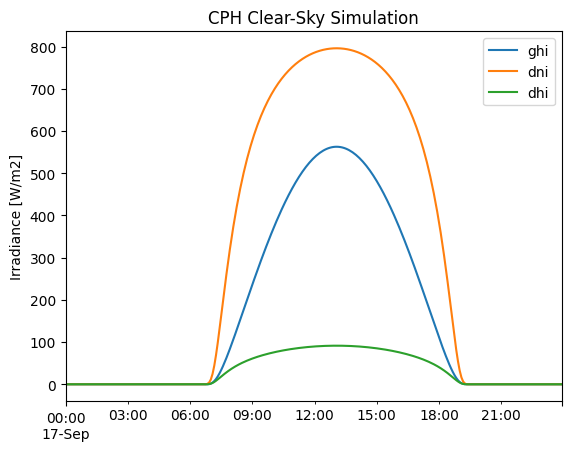

In [4]:
clearsky_irradiance.plot(ylabel='Irradiance [W/m2]', title='CPH Clear-Sky Simulation')

If you want to look up how to use a function, you can either look up its page in the pvlib documentation (https://pvlib-python.readthedocs.io/en/stable/reference/index.html).

## Step 3: Irradiance data
Now, let's get serious and get some actual irradiance data. For this purpose, we will use pvlib's iotools module. You can read about the type of weather data supported [here](https://pvlib-python.readthedocs.io/en/stable/user_guide/weather_data.html).

In this tutorial, we will retrieve TMY irradiance data from PVGIS. The relevant pvlib function is [pvlib.iotools.get_pvgis_tmy](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.iotools.get_pvgis_tmy.html).

Can you figure out how to download data for Copenhagen?

In [5]:
# Write your code here to retrieve irradiance data

## Step 4: Calculate solar position

When using irradiance data, we almost always need to know the solar position for each time step.

Can you figure out how to calculate the solar position for the time steps of the time series downloaded in the previous step?

*Hint: the time steps are the index of the DataFrame from the previous step, use DataFrame.index.*

In [6]:
# Write your code here to calculate solar position

## Step 5: Calculate plane of array irradiance
The irradiance data we have obtained contains the three components:
- global horizontal irradiance (GHI)
- diffuse horizontal irraddiance (DHI)
- direct normal irradiance (DNI)

However, to determine solar energy generation we are interested in the plane of array (POA) irradiance also known as global tilted irradiance (GTI). To transpose the standard irradiance components to tilted irradiance we need to use a transposition model.

Can you find the suitable pvlib function to calculate plane of array irradiance and calculate the irradiance for a south-facing system with a 40-degree tilt?

In [ ]:
# Write your code here to calculate plane of array irradiance
poa_irradiance = pvlib.irradiance.get_total_irradiance(
    surface_tilt=40,
    surface_azimuth=180,
    dni=data['dni'],
    ghi=data['ghi'],
    dhi=data['dhi'],
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth'])

poa_irradiance

# Step 6: Calculate Angle of Incidence

In this exercise we'll investigate a system with the following characteristics:
- Tilt: 40 degrees
- Orientation: south-facing (azimuth=180)

Based on this information, calculate the incidence angle modifier for each time step:

In [ ]:
# Write your code to calculate the incidence angle (there's a pvlib function for that) and the incidence angle modifier (IAM)

# Step 7: Calculate thermal power
With a few assumptions it's easy to calculate the thermal power. The assumptions we'll make are:
- steady state operation (meaning dT/dt is zero)
- mean fluid temperature: 20 °C
- panel area: 2 m²

In [ ]:
# Write your code to calculate the thermal power output

# Extra 1: Calculate module temperature

The power efficiency of a PV module depends on its temperature (roughly, a 0.4% decrease for every increase in degree C).  Module temperature can be estimated based on ambient temperature and POA irradiance.

pvlib includes several models for estimating module temperature. Can you find one in the documentation?

In [11]:
# Write your code here to calculate module temperature using a model of your choosing

# Extra 2: Calculate PV power

With the plane of array irradiance and module temperature ready, we can now estimate the PV output power.  There are several modeling approaches available here, including:

* Simple efficiency (like in PVWatts v5)
* Single-diode models, like in PVsyst and SAM
* Empirical methods like the SAPM

Each type of these PV models requires different types of parameters.  They all produce estimates of the maximum power point (Pmp), while the fancier ones also estimate other quantities like open circuit voltage and short circuit current.

The simplest option is to use [pvlib.pvsystem.pvwatts_dc](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.pvsystem.pvwatts_dc.html).  Can you use it with the POA irradiance and module temperature to estimate the output power for a 300 W module with a temperature coefficient of -0.004?

In [10]:
# Write your code here to calculate PV power